<a href="https://colab.research.google.com/github/NewCoder3294/Weather-Prediction-Model/blob/main/Weather_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Weather Prediction Model

The Data was found in the [NOAA climate data search ](https://www.ncdc.noaa.gov/cdo-web/search)

##Data Implementation

In [3]:
import pandas as pd
weather = pd.read_csv('3911697.csv', index_col='DATE') #From the NOAA

##Preparing Data

###Cleaning Data

In [4]:
weather.apply(pd.isnull).sum()/weather.shape[0]

,0
STATION,0.000000
NAME,0.000000
ACMH,0.553253
ACSH,0.553253
AWND,0.208457
FMTM,0.462855
PGTM,0.295623
PRCP,0.000159
PSUN,0.798379
SNOW,0.384538


In [5]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [6]:
core_weather.apply(pd.isnull).sum()

,0
precip,3
snow,7257
snow_depth,7689
temp_max,0
temp_min,0


In [7]:
core_weather["snow"].value_counts()


,count
snow,
0.0,11613
0.4,1
0.5,1


In [8]:
core_weather["snow_depth"].value_counts()


,count
snow_depth,
0.0,11182
1.0,1


In [9]:
del core_weather["snow"] #Only 3 days of snow so this column will be removed

In [10]:
del core_weather["snow_depth"] #Only 2 days of snow so this column will be removed

In [11]:
core_weather[pd.isnull(core_weather["precip"])]  #remove days that have not measured rain


,precip,temp_max,temp_min
DATE,,,
1998-05-02,NaN,83,66
2021-08-23,NaN,97,79
2021-08-25,NaN,96,80


In [12]:
core_weather.loc["2013-12-15",:]


,2013-12-15
precip,0.0
temp_max,51.0
temp_min,41.0


In [13]:
core_weather["precip"].value_counts() / core_weather.shape[0]


,count
precip,
0.00,0.684400
0.01,0.026653
0.02,0.016956
0.03,0.011075
0.04,0.010545
...,...
4.60,0.000053
3.84,0.000053
4.70,0.000053


In [14]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [15]:
core_weather.apply(pd.isnull).sum()


,0
precip,0
temp_max,0
temp_min,0


In [16]:
core_weather[pd.isnull(core_weather["temp_min"])]


,precip,temp_max,temp_min
DATE,,,


In [17]:
core_weather.loc["2011-12-18":"2011-12-28"]


,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.00,60,41
2011-12-19,0.00,71,40
2011-12-20,0.00,79,56
2011-12-21,0.00,73,62
2011-12-22,0.19,75,57
2011-12-23,0.00,59,52
2011-12-24,0.00,58,50
2011-12-25,0.02,58,55
2011-12-26,0.41,67,52


In [72]:
core_weather = core_weather.fillna(method="bfill")

<ipython-input-72-6312b4fbae84>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="bfill")


In [19]:
core_weather.apply(pd.isnull).sum()


,0
precip,0
temp_max,0
temp_min,0


In [20]:
core_weather.apply(lambda x: (x == 9999).sum())


,0
precip,0
temp_max,0
temp_min,0


###Analyzing Data and Check for any problems or errors such as "9999" in the data

In [21]:
core_weather.dtypes

,0
precip,float64
temp_max,int64
temp_min,int64


In [22]:
core_weather.index


Index(['1973-04-01', '1973-04-02', '1973-04-03', '1973-04-04', '1973-04-05',
       '1973-04-06', '1973-04-07', '1973-04-08', '1973-04-09', '1973-04-10',
       ...
       '2024-11-21', '2024-11-22', '2024-11-23', '2024-11-24', '2024-11-25',
       '2024-11-26', '2024-11-27', '2024-11-28', '2024-11-29', '2024-11-30'],
      dtype='object', name='DATE', length=18872)

In [23]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['1973-04-01', '1973-04-02', '1973-04-03', '1973-04-04',
               '1973-04-05', '1973-04-06', '1973-04-07', '1973-04-08',
               '1973-04-09', '1973-04-10',
               ...
               '2024-11-21', '2024-11-22', '2024-11-23', '2024-11-24',
               '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28',
               '2024-11-29', '2024-11-30'],
              dtype='datetime64[ns]', name='DATE', length=18872, freq=None)

In [24]:
core_weather.index.year


Index([1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=18872)

##Data Visualization

<Axes: xlabel='DATE'>

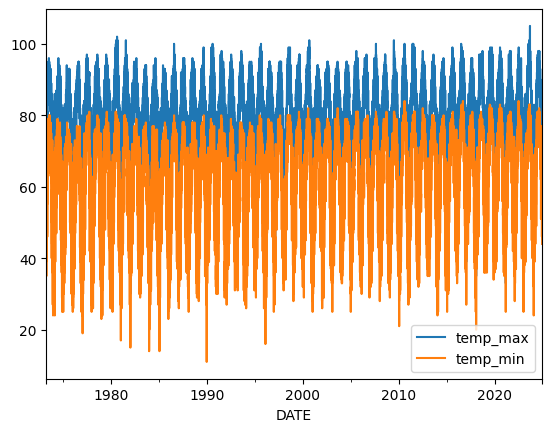

In [25]:
core_weather[["temp_max", "temp_min"]].plot()

In [26]:
core_weather.index.year.value_counts().sort_index()


,count
DATE,
1973,275
1974,365
1975,365
1976,366
1977,365
1978,365
1979,365
1980,366
1981,365


<Axes: xlabel='DATE'>

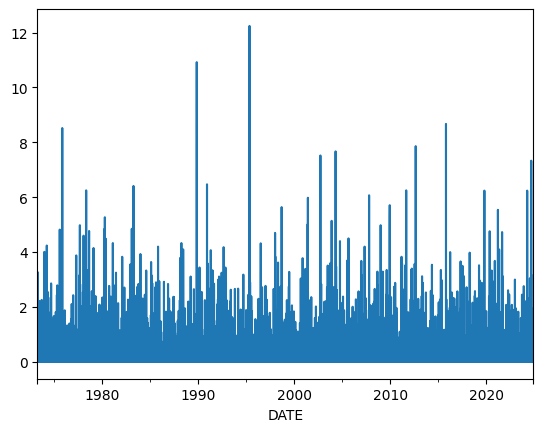

In [27]:
core_weather["precip"].plot()

In [28]:
core_weather.groupby(core_weather.index.year).sum()

,precip,temp_max,temp_min
DATE,,,
1973,59.03,22589,17634
1974,72.79,28712,21780
1975,80.50,28180,21577
1976,47.38,28139,20691
1977,72.80,28422,21540
1978,76.90,28226,21604
1979,60.24,28202,21432
1980,73.09,29046,21897
1981,54.51,28874,21772


<Axes: xlabel='DATE'>

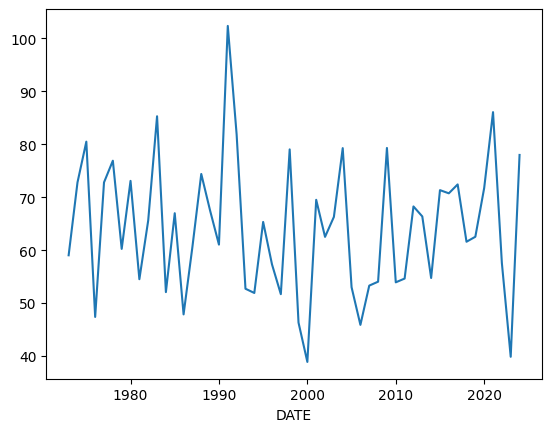

In [29]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()


##Machine Learning Training

In [30]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]
core_weather #some days it is off by a little, other off by a significant amount

,precip,temp_max,temp_min,target
DATE,,,,
1973-04-01,0.00,76,52,79.0
1973-04-02,0.11,79,49,74.0
1973-04-03,0.04,74,61,63.0
1973-04-04,0.00,63,47,62.0
1973-04-05,0.00,62,39,62.0
...,...,...,...,...
2024-11-26,0.03,69,57,78.0
2024-11-27,0.01,78,55,73.0
2024-11-28,0.01,73,54,58.0


In [31]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather


,precip,temp_max,temp_min,target
DATE,,,,
1973-04-01,0.00,76,52,79.0
1973-04-02,0.11,79,49,74.0
1973-04-03,0.04,74,61,63.0
1973-04-04,0.00,63,47,62.0
1973-04-05,0.00,62,39,62.0
...,...,...,...,...
2024-11-25,0.04,81,57,69.0
2024-11-26,0.03,69,57,78.0
2024-11-27,0.01,78,55,73.0


In [32]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)


In [33]:
predictors = ["precip", "temp_max", "temp_min"]


In [34]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [35]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [36]:
predictions = reg.predict(test[predictors])

In [37]:
from sklearn.metrics import mean_absolute_error


In [38]:
mean_absolute_error(test["target"], predictions) #We are ~3.80 off our predictions

3.7958286317736056

##Evaluating the Model

In [39]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [40]:
combined

,actual,predictions
DATE,,
2021-01-01,59.0,70.225653
2021-01-02,59.0,61.999802
2021-01-03,73.0,60.989529
2021-01-04,68.0,71.259716
2021-01-05,67.0,68.830580
...,...,...
2024-11-25,69.0,79.840543
2024-11-26,78.0,71.195370
2024-11-27,73.0,77.379669


<Axes: xlabel='DATE'>

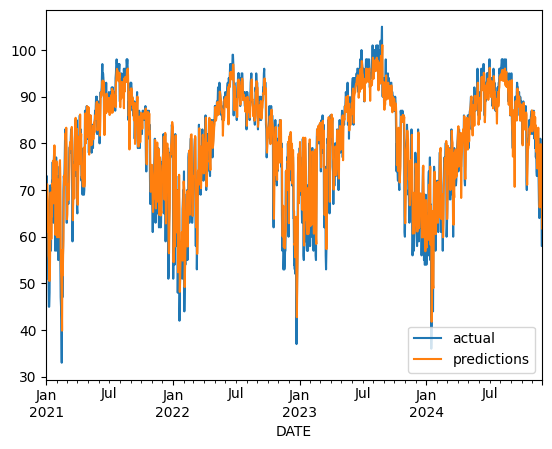

In [41]:
combined.plot() #The models prediction seems to be convservative, prediciting not too high/low.

In [42]:
reg.coef_  #[precip, temp_max, temp_min]

array([-1.35188674,  0.72155771,  0.16837889])

##Creating A Function

In [43]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

##Improving the Model

In [44]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1973-04-01,0.00,76,52,79.0,NaN
1973-04-02,0.11,79,49,74.0,NaN
1973-04-03,0.04,74,61,63.0,NaN
1973-04-04,0.00,63,47,62.0,NaN
1973-04-05,0.00,62,39,62.0,NaN
...,...,...,...,...,...
2024-11-25,0.04,81,57,69.0,79.933333
2024-11-26,0.03,69,57,78.0,79.400000
2024-11-27,0.01,78,55,73.0,79.166667


In [45]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]


In [46]:
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]


In [58]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min"]

In [48]:
core_weather = core_weather.iloc[30:,:].copy()

In [49]:
error, combined = create_predictions(predictors, core_weather, reg)

In [50]:
error #small decrease to ~3.74

3.7414874045380553

<Axes: xlabel='DATE'>

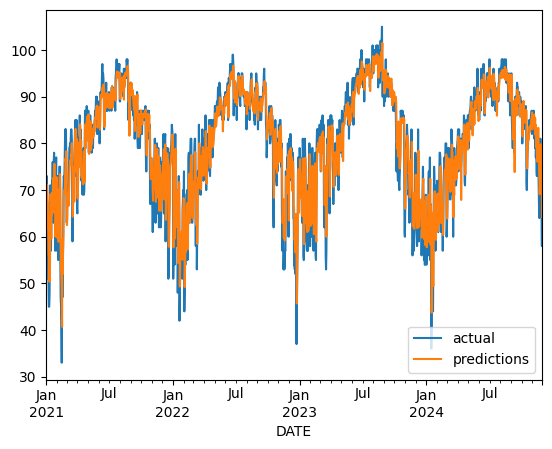

In [52]:
combined.plot()

In [55]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean()).reset_index(level=0, drop=True)
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1973-05-01,0.00,79,66,80.0,73.466667,0.929958,1.196970,79.000000
1973-05-02,0.12,80,69,75.0,73.500000,0.918750,1.159420,79.500000
1973-05-03,0.14,75,61,74.0,73.533333,0.980444,1.229508,78.000000
1973-05-04,0.00,74,52,77.0,73.900000,0.998649,1.423077,77.000000
1973-05-05,0.00,77,47,73.0,74.400000,0.966234,1.638298,77.000000
...,...,...,...,...,...,...,...,...
2024-11-25,0.04,81,57,69.0,79.933333,0.986831,1.421053,71.574277
2024-11-26,0.03,69,57,78.0,79.400000,1.150725,1.210526,71.572622
2024-11-27,0.01,78,55,73.0,79.166667,1.014957,1.418182,71.576750


In [56]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean()).reset_index(level=0, drop=True)

In [59]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "day_of_year_avg", "monthly_avg"]


In [60]:
error, combined = create_predictions(predictors, core_weather, reg)

In [61]:
error # very very small decrease to 3.73

3.7340517508845195

##Model Diagnostics

In [63]:
reg.coef_
# ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "day_of_year_avg", "monthly_avg"]

array([ -1.40890661,   0.24208786,   0.28886899,   0.19531631,
       -10.01372377,   8.59153863,   0.13268807,   0.18260038])

In [64]:
core_weather.corr()["target"]

,target
precip,-0.037539
temp_max,0.885246
temp_min,0.826127
target,1.000000
month_max,0.808392
month_day_max,-0.407372
max_min,-0.389766
monthly_avg,0.822180
day_of_year_avg,0.836772


In [66]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2024-01-15,36.0,62.121717,26.121717
2022-02-03,44.0,67.310852,23.310852
2022-01-02,51.0,73.428208,22.428208
2022-01-20,42.0,63.843839,21.843839
2024-01-19,45.0,64.524192,19.524192
